# 初探神經網路

### 因為在深度學習的應用，常常會有Python和套件版本相依性的問題存在，因此我們這邊提出確認版本的方法，未來電腦程式執行有問題時可以依此確認過!

In [1]:
import tensorflow
print(tensorflow.__version__)

2.8.2


In [4]:
import tensorflow.keras as ks
ks.__version__

'2.8.0'

In [5]:
!python --version

Python 3.7.14


## 載入資料、準備資料

In [6]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
print(train_images.ndim)#ndim 為 3, 有 3 個軸

3


In [8]:
print(train_images.shape)#shape 為 60000x28x28 維的 3D 張量 (有 3 個元素)

(60000, 28, 28)


In [9]:
print(train_images.dtype)#元素的資料型別為 0~255 的整數

uint8


### 顯示第 4 個數字的圖像

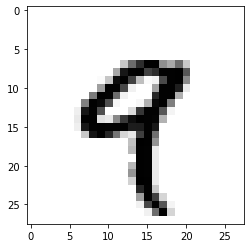

In [ ]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

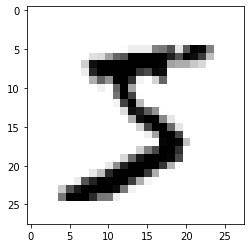

In [ ]:
digit = train_images[0]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

----
## 試試看基本的類神經網路

In [ ]:
# 舊版是這樣
#from keras import models
#from keras import layers
#from keras.datasets import mnist
#from keras.utils import to_categorical


In [1]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
#- 備資料
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
print(train_images[0].shape)

(28, 28)


In [9]:
print(train_images[0][10])

[  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [10]:
#- 整理資料
train_images = train_images.reshape((60000, 28 * 28))  #reshape 是 NumPy 陣列的 method
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


In [11]:
print(train_images[0].shape)

(784,)


In [12]:
print(train_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [13]:

#- 建立layer, model
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


In [18]:

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [19]:
network

In [20]:
#- 準備標籤
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



In [21]:
#- training
network.fit(train_images, train_labels, epochs=5, batch_size=128)



Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2595 - accuracy: 0.9254
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1057 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0687 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0496 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0375 - accuracy: 0.9886


In [22]:
#- testing
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0686 - accuracy: 0.9805
test_acc: 0.9804999828338623
